# Task - 3 Music Recommendation System

# Author: TANUJ

# Data Science Intern at LetsGrowMore

# Music recommender systems can suggest songs to users based on their listening patterns.

Link for the dataset: https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

In [1]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

# Importing all the required libraries

In [120]:
#To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Read all the dataset files

In [3]:
members=pd.read_csv(r"C:\Users\ASUS--VIVOBOOK\Downloads\MUSIC\members.csv")
songs_extra_info=pd.read_csv(r"C:\Users\ASUS--VIVOBOOK\Downloads\MUSIC\song_extra_info.csv")
songs=pd.read_csv(r"C:\Users\ASUS--VIVOBOOK\Downloads\MUSIC\songs.csv")
train=pd.read_csv(r"C:\Users\ASUS--VIVOBOOK\Downloads\MUSIC\train.csv")
test=pd.read_csv(r"C:\Users\ASUS--VIVOBOOK\Downloads\MUSIC\test.csv")
sample_submission=pd.read_csv(r"C:\Users\ASUS--VIVOBOOK\Downloads\MUSIC\sample_submission.csv")

# Complete Analysis of Members data

In [4]:
members

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [5]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [6]:
members.tail()


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920
34402,xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=,1,0,NaN,4,20160815,20160818


In [7]:
members.shape

(34403, 7)

In [8]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [9]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [10]:
#FIND TOTAL MISSING VALUES 
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [11]:
#TREAT MISSING VALUE
members.dropna(inplace=True)

In [12]:

members.isnull().sum()

msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

In [13]:
members.dtypes

msno                      object
city                       int64
bd                         int64
gender                    object
registered_via             int64
registration_init_time     int64
expiration_date            int64
dtype: object

In [14]:
members

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
10,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816
13,RoSfblbwJN/izEnFIVw8TgOpm8R/NEpUC84Oz/b32HQ=,15,33,female,3,20150915,20171019
15,vUzJAyFEudsnkWwfcLIKT5mJAV+uVRTW2uajCrghFwI=,13,20,male,3,20140410,20170427
16,Ev+ouoRTpAjrtxNVeThP6t9xnDG1puQaG28DvJ2db+A=,13,30,male,9,20070330,20170612
...,...,...,...,...,...,...,...
34392,MztOLNMRfOazE4FOBfQPUAoCSkaXJzI/42gRSwm0+hE=,22,43,male,9,20090830,20170915
34393,b2sH2FEdfr+2iyi3FlbQ3aMQwSmx/Mu0QLQHy7PinLA=,4,19,male,9,20150625,20170915
34394,gwRDIcbF3glSxxzs0ReSAhL5qezHN2Z4MMr29IBxeDo=,18,10,male,9,20080301,20170930
34396,UUpdbYb6xeTNAt7dz8EQ7MNOpwH+gk9jMpIx5Hh/WI0=,13,25,female,3,20120104,20170611


# Complete Analysis of Songs_extra_info

In [15]:
songs_extra_info

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
2295966,hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=,Deep Breathing,PLL431720793
2295967,N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=,In Hiding,US5UL1519827
2295968,pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=,Il Est Ne Le Divin Enfant,PLL431502294
2295969,QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=,The Exodus Song,DEPZ69316095


In [16]:
songs_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [17]:
songs_extra_info.tail()

,song_id,name,isrc
2295966,hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=,Deep Breathing,PLL431720793
2295967,N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=,In Hiding,US5UL1519827
2295968,pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=,Il Est Ne Le Divin Enfant,PLL431502294
2295969,QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=,The Exodus Song,DEPZ69316095
2295970,DYKJKSgDOKxb19XzOVO81176qTH0OIHCsfzFRm/BG+g=,Like This,US5UL1512426


In [18]:
songs_extra_info.describe()

,song_id,name,isrc
count,2295971,2295969,2159423
unique,2295971,1168979,1806825
top,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,Intro,GBPS81518952
freq,1,1734,207


In [19]:
songs_extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


In [20]:
songs_extra_info.dtypes

song_id    object
name       object
isrc       object
dtype: object

In [21]:
songs_extra_info.shape

(2295971, 3)

In [22]:
songs_extra_info.isnull().sum()

song_id         0
name            2
isrc       136548
dtype: int64

In [23]:
songs_extra_info.dropna(inplace=True)

In [24]:
songs_extra_info.isnull().sum()

song_id    0
name       0
isrc       0
dtype: int64

# Complete Analysis of Songs data


In [25]:
songs

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0


In [26]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [27]:
songs.tail()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0
2296319,V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=,270466,829,Kim Robertson,NaN,NaN,52.0


In [28]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [29]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [30]:
songs.shape

(2296320, 7)

In [31]:
songs.dtypes

song_id         object
song_length      int64
genre_ids       object
artist_name     object
composer        object
lyricist        object
language       float64
dtype: object

In [32]:
songs.shape

(2296320, 7)

In [33]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

In [34]:
songs.dropna(inplace=True)

In [35]:
songs.isnull().sum()

song_id        0
song_length    0
genre_ids      0
artist_name    0
composer       0
lyricist       0
language       0
dtype: int64

# Complete Analysis of train data

In [36]:
train

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [37]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [38]:
train.tail()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1
7377417,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,Ju0VGkjWeBUZCd7r5Az2hUImhMoWxWLUicOedsmvG0g=,discover,Discover Genre,online-playlist,1


In [39]:
train.dtypes


msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                 int64
dtype: object

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [41]:
train.describe()

,target
count,7.377418e+06
mean,5.035171e-01
std,4.999877e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [42]:
train.shape

(7377418, 6)

In [43]:
train.isnull().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

In [44]:
train.dropna(inplace=True)

In [45]:
train.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
dtype: int64

# Complete Analysis of test data

In [46]:
test

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
2556785,2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist
2556786,2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,NaN,online-playlist
2556787,2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,NaN,online-playlist
2556788,2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,NaN,online-playlist


In [47]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [48]:
test.tail()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
2556785,2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist
2556786,2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,NaN,online-playlist
2556787,2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,NaN,online-playlist
2556788,2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,NaN,online-playlist
2556789,2556789,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ftPDlhAywvcZX7ojE6F+9CDsC22UKX96iEr4W0ciPec=,discover,NaN,online-playlist


In [49]:
test.shape

(2556790, 6)

In [50]:
test.dtypes

id                     int64
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
dtype: object

In [51]:
test.describe()

,id
count,2.556790e+06
mean,1.278394e+06
std,7.380818e+05
min,0.000000e+00
25%,6.391972e+05
50%,1.278394e+06
75%,1.917592e+06
max,2.556789e+06


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  int64 
 1   msno                object
 2   song_id             object
 3   source_system_tab   object
 4   source_screen_name  object
 5   source_type         object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [53]:
test.isnull().sum()

id                         0
msno                       0
song_id                    0
source_system_tab       8442
source_screen_name    162883
source_type             7297
dtype: int64

In [54]:
test.dropna(inplace=True)

In [55]:
test.isnull().sum()

id                    0
msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
dtype: int64

DISPLAYING THE SHAPES

In [56]:
print(f"The songs has {songs.shape[0]} rows and {songs.shape[1]} columns")
print(f"The songs_extra_info  has {songs_extra_info.shape[0]} rows and {songs_extra_info.shape[1]} columns")
print(f"The members has {members.shape[0]} rows and {members.shape[1]} columns")
print(f"The sample_submission  has {sample_submission.shape[0]} rows and {sample_submission.shape[1]} columns")
print(f"The train has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"The test has {test.shape[0]} rows and {test.shape[1]} columns")

The songs has 330443 rows and 7 columns
The songs_extra_info  has 2159422 rows and 3 columns
The members has 14501 rows and 7 columns
The sample_submission  has 2556790 rows and 2 columns
The train has 6959297 rows and 6 columns
The test has 2392626 rows and 6 columns


# EDA on Songs dataset

In [57]:
print("Columns present in the songs_data are:")
for columns in songs.columns:
    print(columns)

Columns present in the songs_data are:
song_id
song_length
genre_ids
artist_name
composer
lyricist
language


In [58]:
print("Columns present in the songs_data are:")
for columns in songs.columns:
    print(columns)

Columns present in the songs_data are:
song_id
song_length
genre_ids
artist_name
composer
lyricist
language


In [59]:
print(f"Number of records : {songs.shape[0]}")
print(f"Count of distinct song lengths : {len(songs.song_length.unique())}")
print(f"Count of distinct genre ids : {len(songs.genre_ids.unique())}")
print(f"Count of distinct artist name : {len(songs.artist_name.unique())}")
print(f"Count of distinct composer : {len(songs.composer.unique())}")
print(f"Count of distinct lyricist : {len(songs.lyricist.unique())}")
print(f"Count of distinct languages : {len(songs.language.unique())}")

Number of records : 330443
Count of distinct song lengths : 71600
Count of distinct genre ids : 576
Count of distinct artist name : 31778
Count of distinct composer : 107975
Count of distinct lyricist : 106408
Count of distinct languages : 10


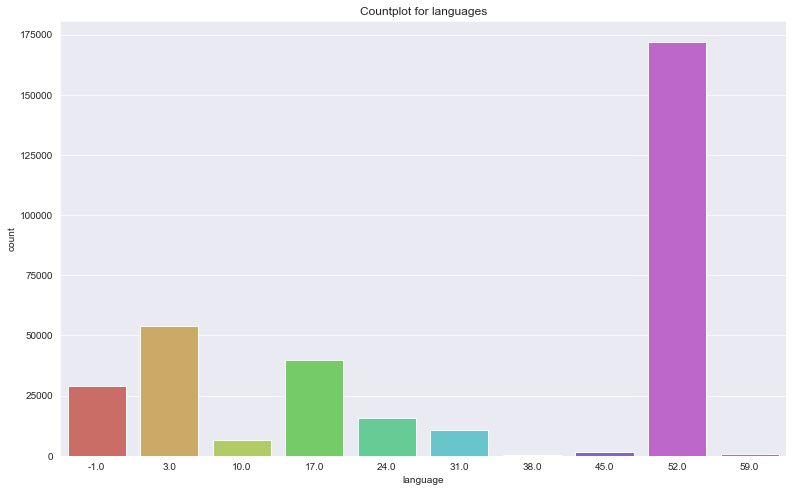

In [60]:
plt.figure(figsize = (13, 8))
sns.set_style("darkgrid")
ax = sns.countplot(x = songs.language, data = songs.language,palette="hls",)
ax.set_title("Countplot for languages")
plt.show()

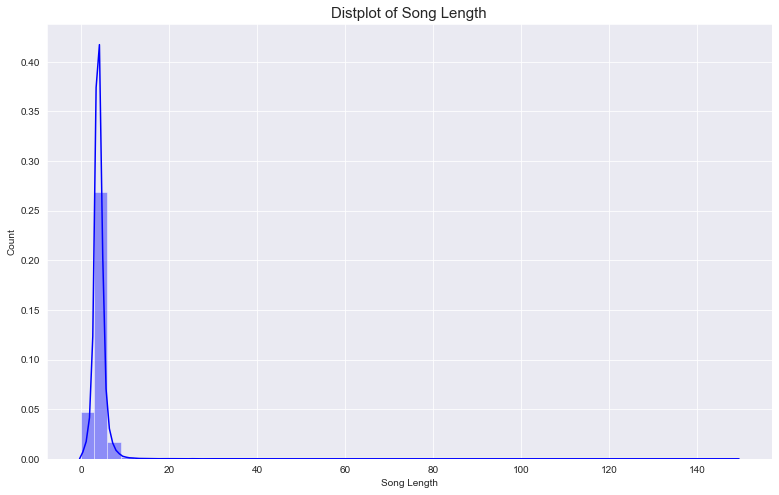

In [61]:
plt.figure(figsize=(13, 8))
sns.set_style("darkgrid")
ax = sns.distplot(songs.song_length/60000, color='b')
ax.set_title('Distplot of Song Length', fontsize=15)
ax.set(xlabel='Song Length', ylabel='Count')
plt.show()

In [62]:
songs.genre_ids.value_counts()

465              145079
2022              24601
1609              14450
458               11758
437               11188
                  ...  
388|1609              1
921|2189|798          1
1152|205              1
2130|275|1572         1
1138|2022             1
Name: genre_ids, Length: 576, dtype: int64

In [63]:
songs['genre_ids'].fillna('465',inplace=True)

In [64]:
songs['language'].value_counts()

 52.0    172044
 3.0      53985
 17.0     39679
-1.0      29185
 24.0     15531
 31.0     10706
 10.0      6682
 45.0      1611
 59.0       631
 38.0       389
Name: language, dtype: int64

In [65]:
songs['language'].fillna(52.0,inplace=True)

In [66]:
songs.drop(['composer'], axis =1, inplace=True)
songs.drop(['lyricist'], axis =1, inplace=True)

<AxesSubplot:xlabel='language', ylabel='count'>

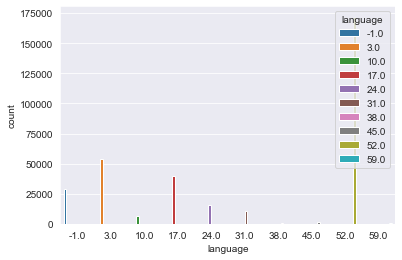

In [67]:
sns.countplot(x = songs['language'],data =train,hue=songs['language'],orient='v')

# EDA on songs_extra_info dataset

In [68]:
print("Columns present in the songs_extra_info are:")
for columns in songs_extra_info.columns:
    print(columns)

Columns present in the songs_extra_info are:
song_id
name
isrc


In [69]:
songs_extra_info.drop('isrc', axis = 1, inplace = True)

In [70]:
songs_extra_info.isnull().sum()

song_id    0
name       0
dtype: int64

In [71]:
songs_extra_info.dropna(inplace=True)

In [72]:
songs_extra_info.isnull().sum()

song_id    0
name       0
dtype: int64

# EDA on member dataset

In [73]:
print("Columns present in the members are:")
for columns in members.columns:
    print(columns)

Columns present in the members are:
msno
city
bd
gender
registered_via
registration_init_time
expiration_date


Text(0.5, 1.0, 'Count plot for gender')

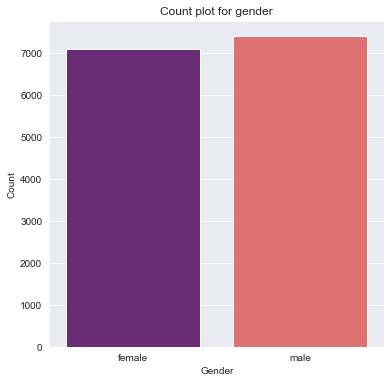

In [74]:
plt.figure(figsize=(6,6))
sns.countplot(members['gender'], data=members, palette = 'magma')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation='0')
plt.title('Count plot for gender')

In [75]:
members.isnull().sum()

msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

Text(0.5, 1.0, 'Count plot for Registation Method')

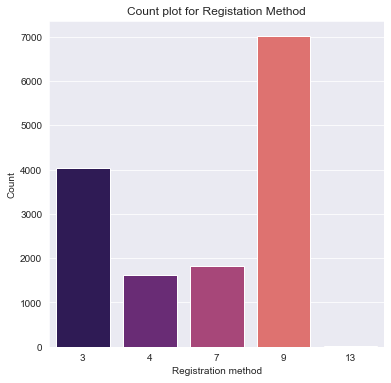

In [76]:
plt.figure(figsize=(6,6))
sns.countplot(members['registered_via'], data=members, palette = 'magma')
plt.xlabel('Registration method')
plt.ylabel('Count')
plt.xticks(rotation='0')
plt.title('Count plot for Registation Method')

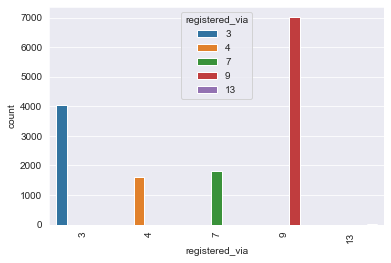

In [77]:
sns.countplot(x = members['registered_via'],hue=members['registered_via'],orient='v')
plt.xticks(rotation =90)
plt.show()

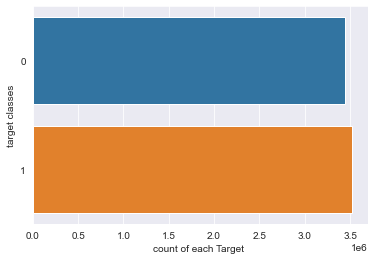

In [78]:
sns.countplot(y=train['target'],data=train)
plt.ylabel('target classes')
plt.xlabel('count of each Target ')
plt.show()

# EDA on Training set

In [79]:
print(f"Total number of records : {train.shape[0]}")

Total number of records : 6959297


Text(0.5, 1.0, 'Count plot for system tab there are using')

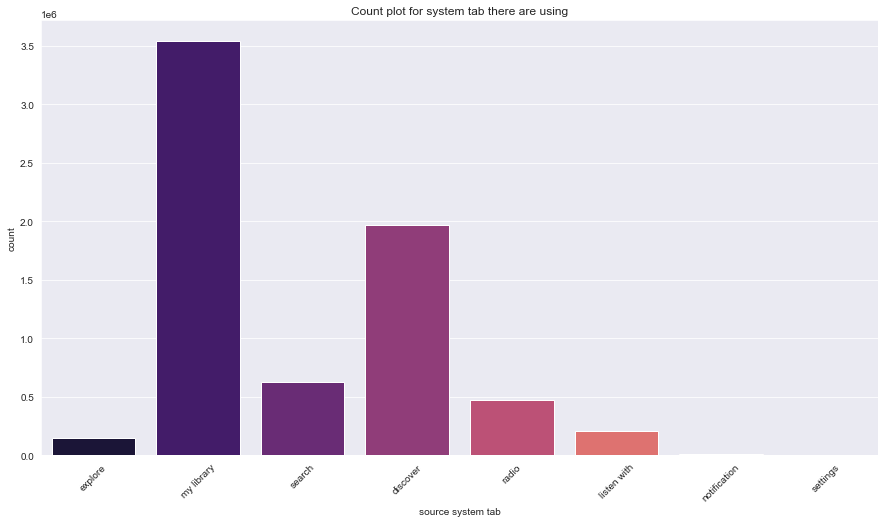

In [80]:
plt.figure(figsize=(15,8))
sns.countplot(train['source_system_tab'],data=train, palette = 'magma')
plt.xlabel('source system tab')
plt.ylabel('count')
plt.xticks(rotation='45')
plt.title('Count plot for system tab there are using')

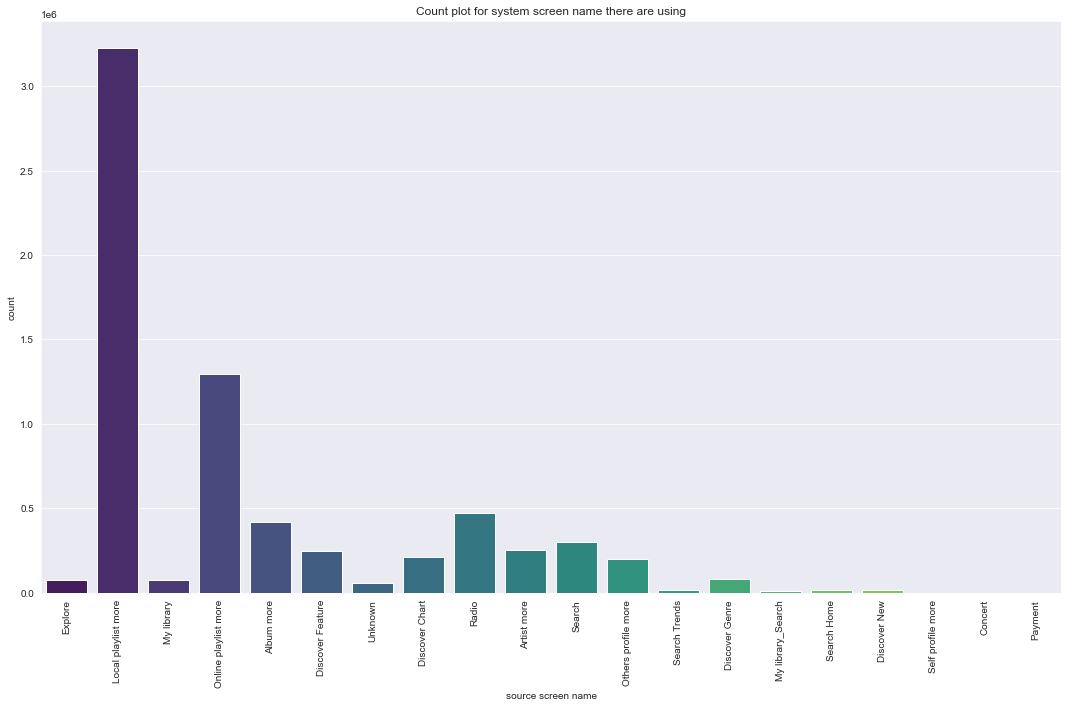

In [81]:
plt.figure(figsize=(15,10))
sns.countplot(x=train['source_screen_name'],data=train, palette = 'viridis')
sns.set(style="darkgrid")
plt.xlabel('source screen name')
plt.ylabel('count')
plt.xticks(rotation='90')
plt.title('Count plot for system screen name there are using')
plt.tight_layout()


In [82]:
print("Total percentage for NaN value in target column  : ",(train["target"].isna().sum()/len(train["target"]))*100,"%")

Total percentage for NaN value in target column  :  0.0 %


In [83]:
duplicate_values = len(train["msno"])-train["msno"].nunique()
print("Total no of duplicate user id         : ",duplicate_values)
print("Total percentage of duplicate user id : ",(duplicate_values/len(train["msno"]))*100,"%")

Total no of duplicate user id         :  6928838
Total percentage of duplicate user id :  99.5623264821145 %


In [84]:
duplicate_values1 = len(train["song_id"])-train["song_id"].nunique()
print("Total no of duplicate song id         : ",duplicate_values1)
print("Total percentage of duplicate song id : ",(duplicate_values1/len(train["song_id"]))*100,"%")

Total no of duplicate song id         :  6608782
Total percentage of duplicate song id :  94.96335621255997 %


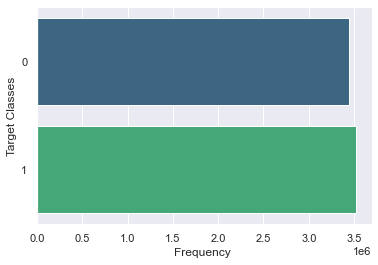

In [85]:
sns.countplot(y=train['target'],data=train, palette = 'viridis')
plt.ylabel('Target Classes')
plt.xlabel('Frequency ')
plt.show()

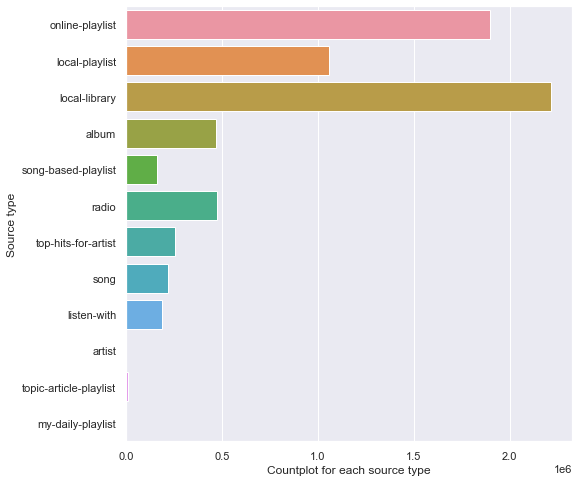

In [86]:
plt.figure(figsize = (8,8))
sns.countplot(y=train['source_type'],data=train)
plt.ylabel('Source type')
plt.xlabel('Countplot for each source type')
plt.show()


In [87]:
train.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
dtype: int64

In [88]:
train['source_system_tab'].fillna('my library',inplace=True)
train['source_type'].fillna('local-library',inplace=True)
train['source_screen_name'].fillna('Local playlist',inplace=True)

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

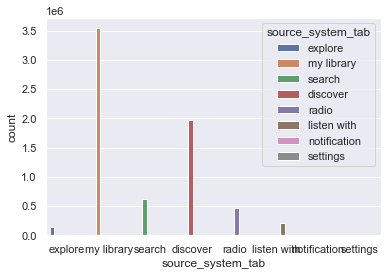

In [89]:
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

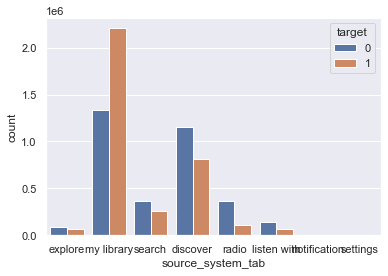

In [90]:
sns.countplot(x = train['source_system_tab'],hue=train['target'])

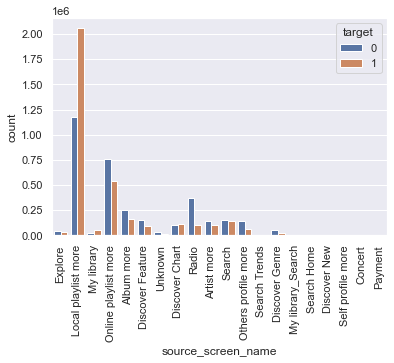

In [91]:
sns.countplot(x = train['source_screen_name'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

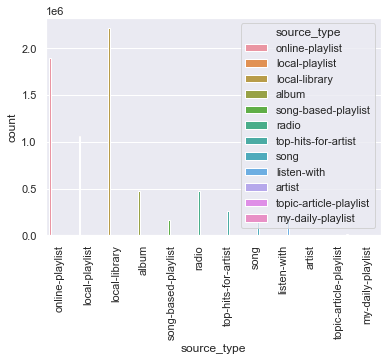

In [92]:
sns.countplot(x = train['source_type'],hue=train['source_type'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()


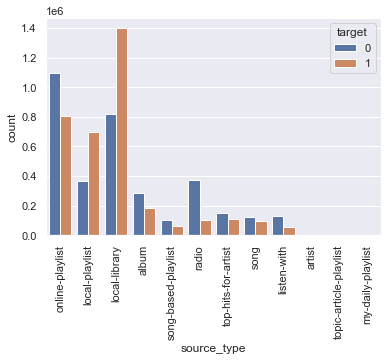

In [93]:
sns.countplot(x = train['source_type'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

# Displaying information about the Test Dataset and Sample Submission Dataset

In [94]:
print("Columns present in the test are:")
for columns in test.columns:
    print(columns)


Columns present in the test are:
id
msno
song_id
source_system_tab
source_screen_name
source_type


In [95]:
print("Columns present in the sample_submission are:")
for columns in sample_submission.columns:
    print(columns)

Columns present in the sample_submission are:
id
target


# Merging the datasets

In [96]:
merged_songs = pd.merge(songs, songs_extra_info, on ='song_id' ,how='left')
merged_train_members = pd.merge(train, members, on ='msno' ,how='left')
train = pd.merge(merged_train_members, merged_songs, on ='song_id' ,how='left')

In [97]:
train

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,language,name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13.0,24.0,female,9.0,20110525.0,20170911.0,NaN,NaN,NaN,NaN,NaN
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13.0,24.0,female,9.0,20110525.0,20170911.0,NaN,NaN,NaN,NaN,NaN
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13.0,24.0,female,9.0,20110525.0,20170911.0,NaN,NaN,NaN,NaN,NaN
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6959292,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1,4.0,26.0,female,9.0,20041218.0,20170930.0,NaN,NaN,NaN,NaN,NaN
6959293,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0,NaN,NaN,NaN,NaN,NaN,NaN,227404.0,465,R. City feat. Adam Levine,52.0,Locked Away
6959294,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1,NaN,NaN,NaN,NaN,NaN,NaN,258298.0,465,兄弟本色G.U.T.S. (姚中仁、張震嶽、頑童MJ116),3.0,FLY OUT
6959295,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing & Label Encoding

In [98]:
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [102]:
train.shape

(6959297, 17)

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6959297 entries, 0 to 6959296
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   city                    float64
 7   bd                      float64
 8   gender                  object 
 9   registered_via          float64
 10  registration_init_time  float64
 11  expiration_date         float64
 12  song_length             float64
 13  genre_ids               object 
 14  artist_name             object 
 15  language                float64
 16  name                    object 
dtypes: float64(7), int64(1), object(9)
memory usage: 955.7+ MB


In [104]:
train.describe()

,target,city,bd,registered_via,registration_init_time,expiration_date,song_length,language
count,6.959297e+06,4.185007e+06,4.185007e+06,4.185007e+06,4.185007e+06,4.185007e+06,3.859411e+06,3.859411e+06
mean,5.055371e-01,1.080243e+01,2.833352e+01,6.952229e+00,2.011811e+07,2.017209e+07,2.492164e+05,1.088722e+01
std,4.999694e-01,5.870693e+00,2.175296e+01,2.575220e+00,3.224529e+04,4.110733e+03,4.485350e+04,1.602088e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,2.004033e+07,2.004102e+07,4.109000e+03,-1.000000e+00
25%,0.000000e+00,5.000000e+00,2.200000e+01,4.000000e+00,2.010082e+07,2.017091e+07,2.213090e+05,3.000000e+00
50%,1.000000e+00,1.300000e+01,2.700000e+01,9.000000e+00,2.012092e+07,2.017093e+07,2.479800e+05,3.000000e+00
75%,1.000000e+00,1.400000e+01,3.200000e+01,9.000000e+00,2.014112e+07,2.017102e+07,2.749470e+05,3.000000e+00
max,1.000000e+00,2.200000e+01,1.051000e+03,1.300000e+01,2.017013e+07,2.020102e+07,4.793341e+06,5.900000e+01


In [105]:
train.drop(['msno'], axis = 1, inplace=True)
train.drop(['song_id'], axis = 1, inplace=True)

In [106]:
df = train

In [107]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
source_system_tab = encoder.fit_transform(df['source_system_tab'])
source_screen_name = encoder.fit_transform(df['source_screen_name'])
source_type = encoder.fit_transform(df['source_type'])
gender	= encoder.fit_transform(df['gender'])
artist_name = encoder.fit_transform(df['artist_name'])
name = encoder.fit_transform(df['name'])
genre_ids = encoder.fit_transform(df['genre_ids'])

In [108]:
df['source_system_tab'] = source_system_tab
df['source_screen_name'] = source_screen_name
df['source_type'] = source_type
df['gender'] = gender
df['artist_name'] = artist_name
df['name'] = name
df['genre_ids'] = genre_ids
df

,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,language,name
0,1,7,6,1,NaN,NaN,2,NaN,NaN,NaN,NaN,283,9889,NaN,55493
1,3,8,4,1,13.0,24.0,0,9.0,20110525.0,20170911.0,NaN,283,9889,NaN,55493
2,3,8,4,1,13.0,24.0,0,9.0,20110525.0,20170911.0,NaN,283,9889,NaN,55493
3,3,8,4,1,13.0,24.0,0,9.0,20110525.0,20170911.0,NaN,283,9889,NaN,55493
4,1,7,6,1,NaN,NaN,2,NaN,NaN,NaN,NaN,283,9889,NaN,55493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6959292,3,8,4,1,4.0,26.0,0,9.0,20041218.0,20170930.0,NaN,283,9889,NaN,55493
6959293,6,15,8,0,NaN,NaN,2,NaN,NaN,NaN,227404.0,182,4352,52.0,14759
6959294,6,15,8,1,NaN,NaN,2,NaN,NaN,NaN,258298.0,182,6646,3.0,7519
6959295,0,5,6,1,NaN,NaN,2,NaN,NaN,NaN,NaN,283,9889,NaN,55493


In [109]:
df.isnull().sum()

source_system_tab               0
source_screen_name              0
source_type                     0
target                          0
city                      2774290
bd                        2774290
gender                          0
registered_via            2774290
registration_init_time    2774290
expiration_date           2774290
song_length               3099886
genre_ids                       0
artist_name                     0
language                  3099886
name                            0
dtype: int64

In [110]:
df.dropna(inplace=True)

In [111]:
df.isnull().sum()

source_system_tab         0
source_screen_name        0
source_type               0
target                    0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
song_length               0
genre_ids                 0
artist_name               0
language                  0
name                      0
dtype: int64

In [112]:
df.to_csv('preprocessed_data2.csv')

In [113]:
df1 = df[0:30000]

# Model Building and Evaluation

In [114]:
Y = df1.target
X = df1.drop('target', axis = 1)


In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [128]:
X_train.shape

(22500, 14)

In [129]:
X_test.shape

(7500, 14)

In [130]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [131]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
pred = rfc.predict(X_test)

# Model Evaluation

In [132]:
print ("Accuracy is :", accuracy_score(Y_test, pred)*100)
print ("\nConfusion matrix :\n",confusion_matrix(Y_test, pred))

Accuracy is : 83.82666666666667

Confusion matrix :
 [[ 578  967]
 [ 246 5709]]


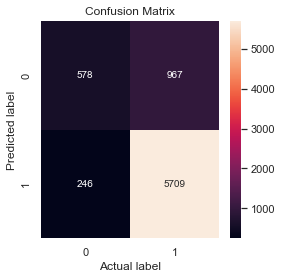

In [133]:
plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix(Y_test, pred), annot = True, fmt = 'g')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

In [134]:
pred_prob = rfc.predict_proba(X_test)

In [136]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(Y_test, pred_prob[:,1])

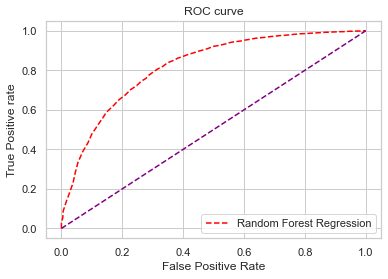

In [139]:
sns.set_style('whitegrid')
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='red', label='Random Forest Regression')
#plt.plot(thresh, linestyle='--', color='blue')
plt.plot([0, 1], ls="--", color='purple')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend()
plt.savefig('ROC',dpi=300)
plt.show();

# TASK COMPLETED 

# THANKS & regards

# TANUJ